### Portfolio Analysis

## Data Gathering

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

In [ ]:
# Initialize dictionary to store uploaded files
uploaded_files = {}

In [ ]:
#set up a loop to read all files in one
for _ in range(8):
    # Upload files
    uploaded = files.upload()

    # Update dictionary with newly uploaded files
    uploaded_files.update(uploaded)

Saving AAPL_close.csv to AAPL_close.csv


Saving VFH_close.csv to VFH_close.csv


Saving SP500_close.csv to SP500_close.csv


Saving MCD_close.csv to MCD_close.csv


Saving JPM_close.csv to JPM_close.csv


Saving VUG_close.csv to VUG_close.csv


Saving VZ_close.csv to VZ_close.csv


Saving CVX_close.csv to CVX_close.csv


In [ ]:
#Use the path function along with the read_csv function to import the datasets
aapl = Path("AAPL_close.csv")
vfh = Path("VFH_close.csv")
sp = Path("SP500_close.csv")
mcd = Path("MCD_close.csv")
jpm = Path("JPM_close.csv")
vug = Path("VUG_close.csv")
vz = Path("VZ_close.csv")
cvx = Path("CVX_close.csv")


aapl_df = pd.read_csv(aapl, index_col="Date", infer_datetime_format=True, parse_dates=True)
vfh_df = pd.read_csv(vfh, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df = pd.read_csv(sp, index_col="Date", infer_datetime_format=True, parse_dates=True)
mcd_df = pd.read_csv(mcd, index_col="Date", infer_datetime_format=True, parse_dates=True)
jpm_df = pd.read_csv(jpm, index_col="Date", infer_datetime_format=True, parse_dates=True)
vug_df = pd.read_csv(vug, index_col="Date", infer_datetime_format=True, parse_dates=True)
vz_df = pd.read_csv(vz, index_col="Date", infer_datetime_format=True, parse_dates=True)
cvx_df = pd.read_csv(cvx, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.head()

<ipython-input-4-30c4e60e6b18>:11: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl, index_col="Date", infer_datetime_format=True, parse_dates=True)
<ipython-input-4-30c4e60e6b18>:12: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vfh_df = pd.read_csv(vfh, index_col="Date", infer_datetime_format=True, parse_dates=True)
<ipython-input-4-30c4e60e6b18>:13: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org

,SP500_Close
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912


## Exploartory Data Analysis

In [ ]:
display(aapl_df.head())
display(vfh_df.head())
sp_df.head()

,AAPL_close
Date,
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498
2019-01-08,37.687500


,VFH_Close
Date,
2019-01-02,59.810001
2019-01-03,58.779999
2019-01-04,60.700001
2019-01-07,60.840000
2019-01-08,60.930000


,SP500_Close
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912


In [ ]:
#combining each stocks dataset into one dataframe using the concat function from pandas.
df= pd.concat([aapl_df, sp_df,vfh_df,mcd_df,jpm_df,vug_df,vz_df,cvx_df], axis = 1, join = 'inner')
df.head()

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,39.480000,2510.030029,59.810001,176.059998,99.309998,134.289993,56.020000,110.690002
2019-01-03,35.547501,2447.889893,58.779999,174.899994,97.110001,130.179993,56.220001,108.570000
2019-01-04,37.064999,2531.939941,60.700001,178.279999,100.690002,135.360001,56.360001,110.820000
2019-01-07,36.982498,2549.689941,60.840000,180.220001,100.760002,136.740005,56.720001,112.260002
2019-01-08,37.687500,2574.409912,60.930000,180.600006,100.570000,138.410004,58.380001,111.769997


In [ ]:
#checking if there are nulls
df.isnull().sum()


AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

In [ ]:
df_close =df.iloc[:, 2:]

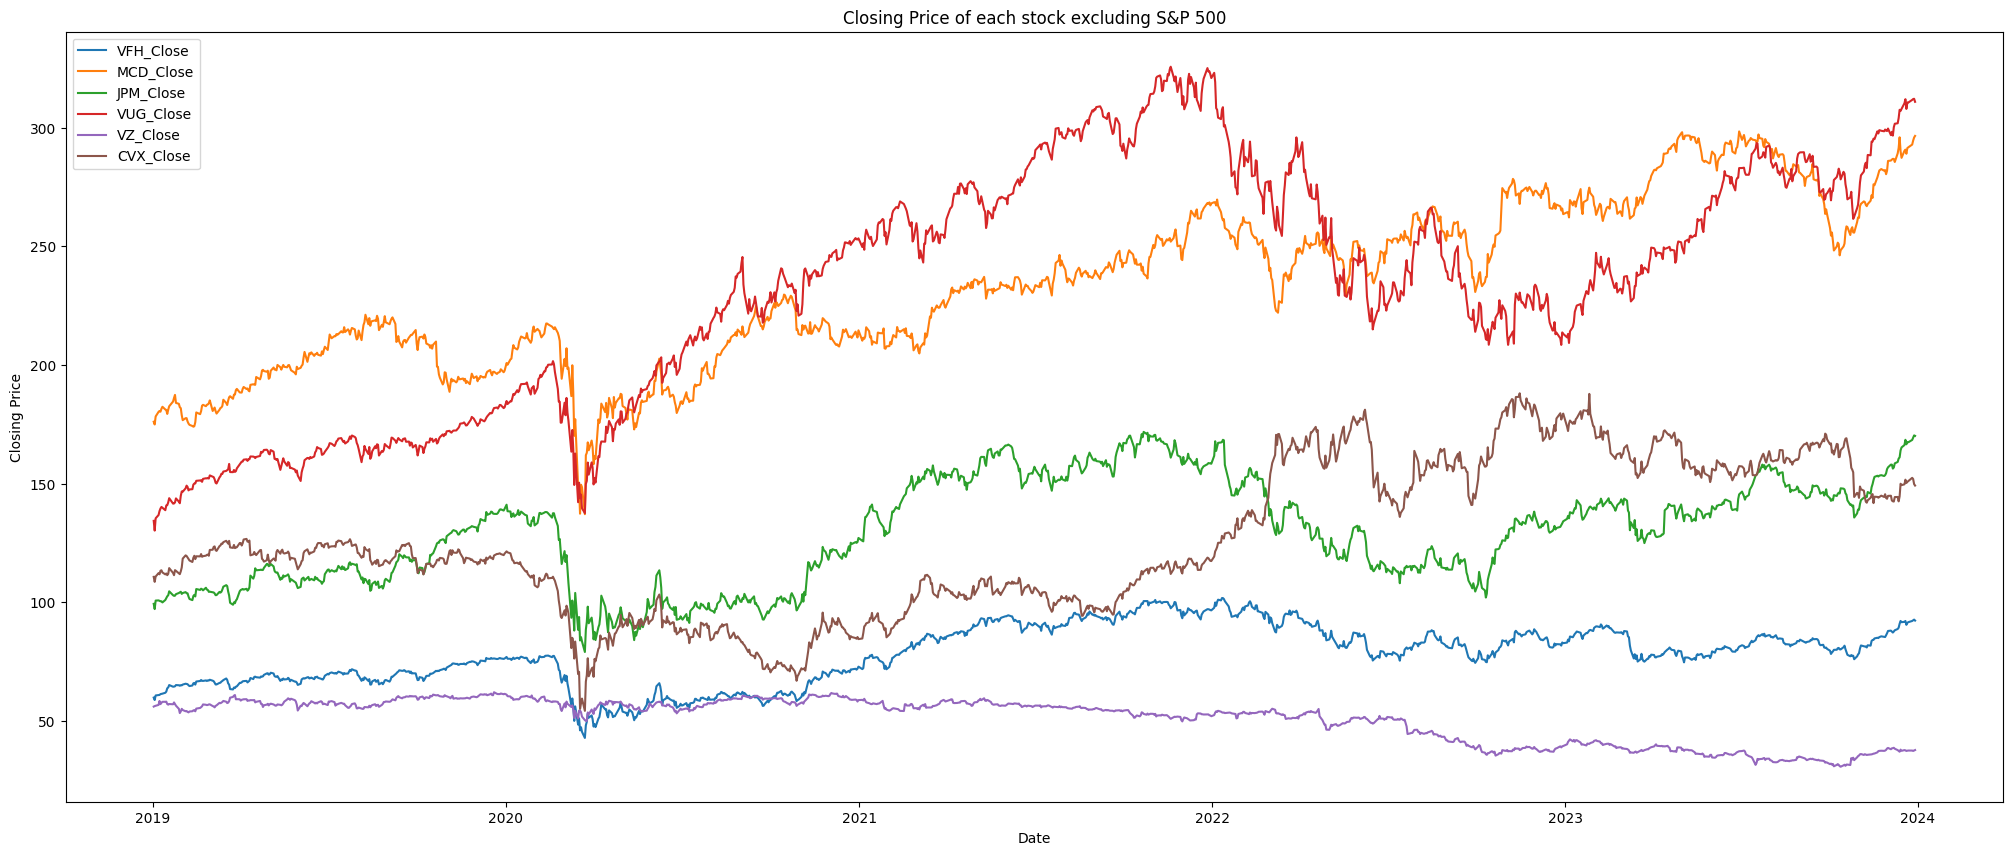

In [ ]:
#visual representation of the closing price of each stock
plt.figure(figsize=(25, 10))
for column in df_close.columns:
        plt.plot(df_close.index, df_close[column], label=column)

plt.title('Closing Price of each stock excluding S&P 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
#first technical analysis getting the percent change of prices from 2019 to 2023
daily_returns = df.pct_change()
daily_returns

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.024757,-0.017221,-0.006589,-0.022153,-0.030605,0.003570,-0.019153
2019-01-04,0.042689,0.034336,0.032664,0.019325,0.036865,0.039791,0.002490,0.020724
2019-01-07,-0.002226,0.007010,0.002306,0.010882,0.000695,0.010195,0.006388,0.012994
2019-01-08,0.019063,0.009695,0.001479,0.002109,-0.001886,0.012213,0.029267,-0.004365
...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,0.001660,0.003176,0.001064,-0.000597,-0.000097,0.001603,0.002256
2023-12-26,-0.002841,0.004232,0.005459,0.003977,0.005914,0.003574,-0.000267,0.009004
2023-12-27,0.000518,0.001430,0.003149,0.005771,0.005998,0.001123,-0.004536,-0.003281


<Axes: xlabel='Date'>

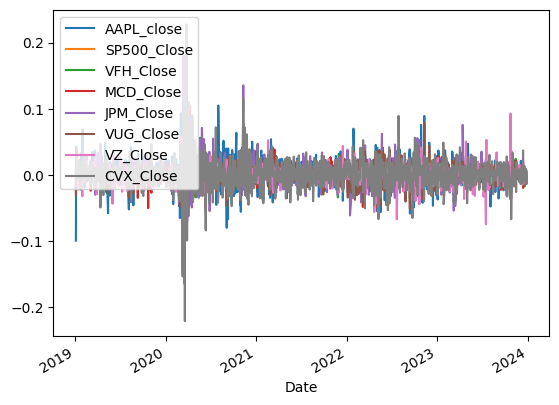

In [ ]:
# Plotting daily returns of all stocks
daily_returns.plot()

In [ ]:
daily_returns.isnull().sum()

AAPL_close     1
SP500_Close    1
VFH_Close      1
MCD_Close      1
JPM_Close      1
VUG_Close      1
VZ_Close       1
CVX_Close      1
dtype: int64

In [ ]:
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

In [ ]:
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2019-01-03 to 2023-12-29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AAPL_close   1257 non-null   float64
 1   SP500_Close  1257 non-null   float64
 2   VFH_Close    1257 non-null   float64
 3   MCD_Close    1257 non-null   float64
 4   JPM_Close    1257 non-null   float64
 5   VUG_Close    1257 non-null   float64
 6   VZ_Close     1257 non-null   float64
 7   CVX_Close    1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


In [ ]:
daily_returns.head()

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-03,-0.099607,-0.024757,-0.017221,-0.006589,-0.022153,-0.030605,0.003570,-0.019153
2019-01-04,0.042689,0.034336,0.032664,0.019325,0.036865,0.039791,0.002490,0.020724
2019-01-07,-0.002226,0.007010,0.002306,0.010882,0.000695,0.010195,0.006388,0.012994
2019-01-08,0.019063,0.009695,0.001479,0.002109,-0.001886,0.012213,0.029267,-0.004365
2019-01-09,0.016982,0.004098,0.005580,-0.001717,-0.001690,0.007803,-0.022782,0.013420


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


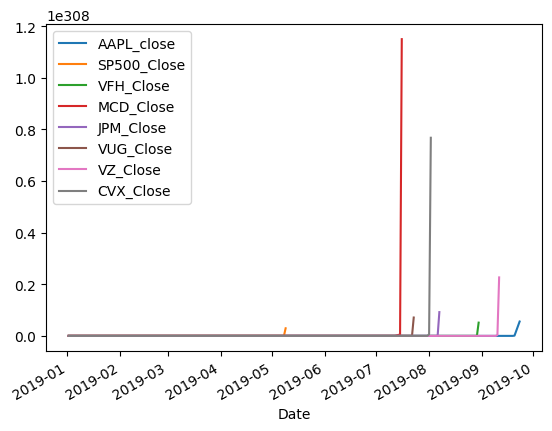

In [ ]:
# Calculating cumulative returns of all stocks
cumulative_return = df.cumprod()
cumulative_return
# Plotting cumulative returns
cumulative_return.plot()

In [ ]:
cumulative_return.head()

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,3.948000e+01,2.510030e+03,5.981000e+01,1.760600e+02,9.931000e+01,1.342900e+02,5.602000e+01,1.106900e+02
2019-01-03,1.403415e+03,6.144277e+06,3.515632e+03,3.079289e+04,9.643994e+03,1.748187e+04,3.149444e+03,1.201761e+04
2019-01-04,5.201759e+04,1.555694e+10,2.133989e+05,5.489757e+06,9.710538e+05,2.366346e+06,1.775027e+05,1.331792e+06
2019-01-07,1.923740e+06,3.966538e+13,1.298319e+07,9.893640e+08,9.784338e+07,3.235742e+08,1.006795e+07,1.495070e+08
2019-01-08,7.250096e+07,1.021149e+17,7.910655e+08,1.786791e+11,9.840109e+09,4.478590e+10,5.877671e+08,1.671039e+10


In [ ]:
cumulative_return.isnull().sum()

AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

# Technical Analysis

Here we are determining the performance of each stock to be added to a portfolio that we believe may compete with the S&P 500.

1. We create a box plot for each stock.
2. Then we calculate the standard deviation for all stocks
4. Determine which stocks are riskier than the S&P 500
5. lastly we will calculate the Annualized Sharpe Ratio

### Creating a box plot for each portfolio

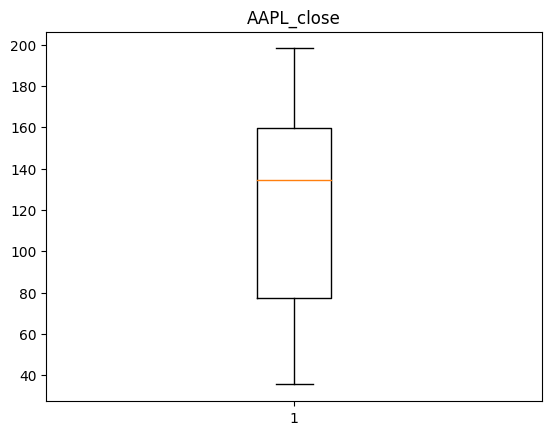

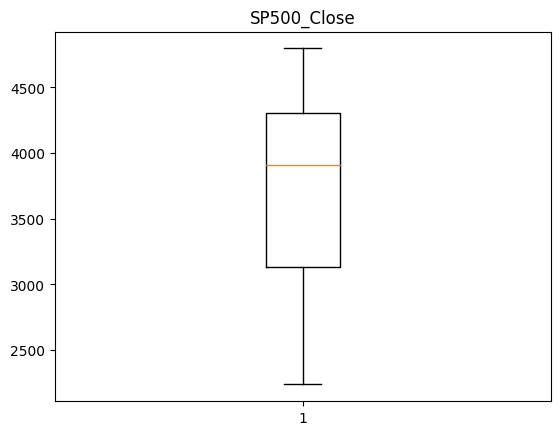

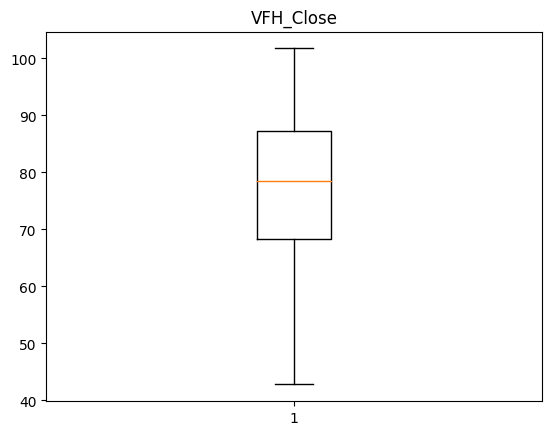

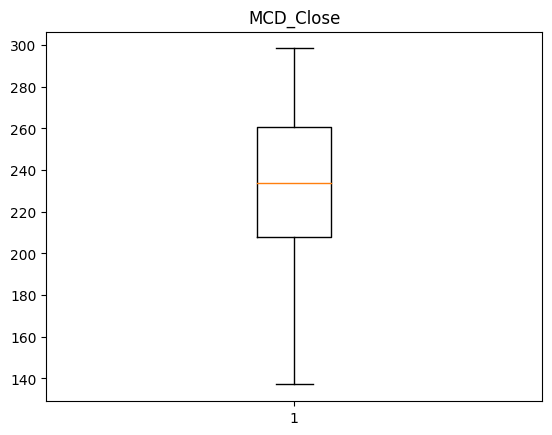

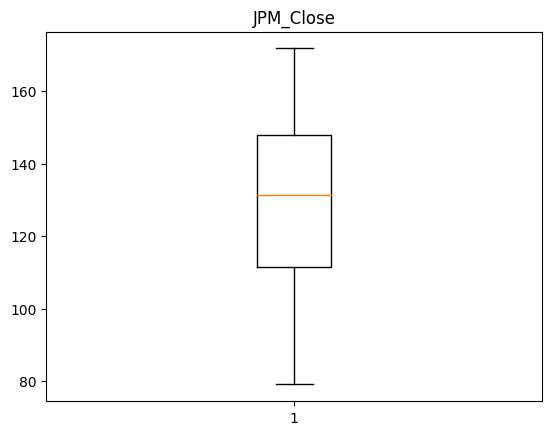

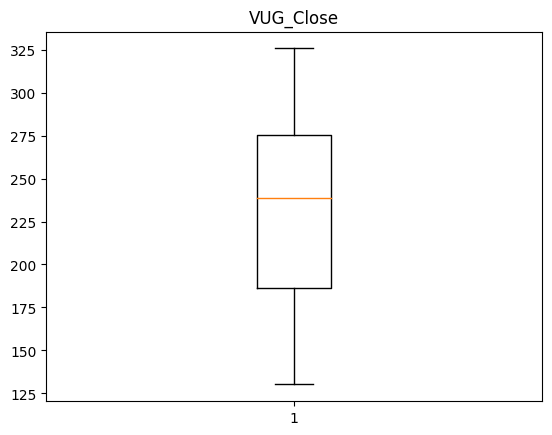

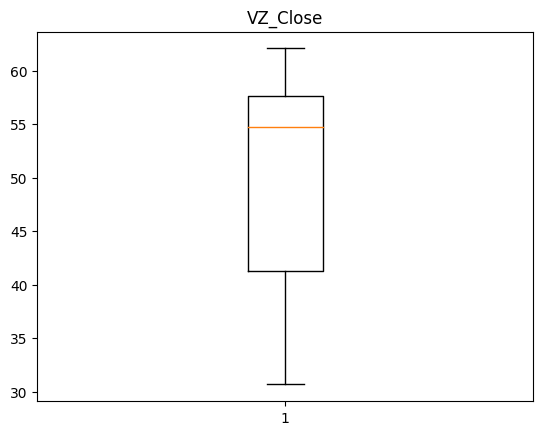

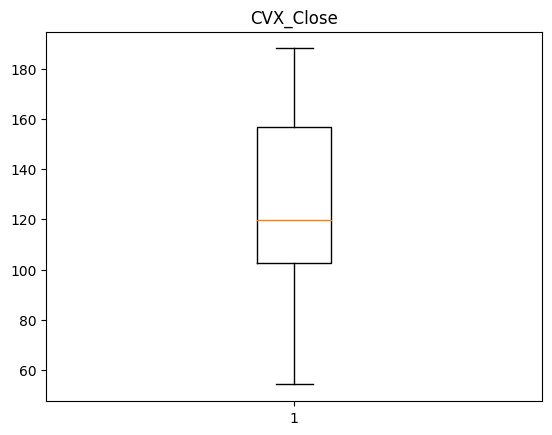

In [ ]:
# Box plot to visually show risk, 25th and 75th percentile, outliers, and standard deviation.
for column in df.columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()


### Calculating Standard Deviations

In [ ]:
df_std = df.std()
df_std

AAPL_close      46.527387
SP500_Close    634.050177
VFH_Close       12.359487
MCD_Close       34.159286
JPM_Close       22.008490
VUG_Close       50.229268
VZ_Close         9.050779
CVX_Close       30.961282
dtype: float64

### Determine which stocks are riskier than the S&P 500

In [ ]:
# Calculating the daily standard deviation of S&P 500
df['SP500_Close'].std()


634.0501770024873

In [ ]:
# Determining which stocks are riskier than the S&P 500
port_std = df[['AAPL_close','VFH_Close','MCD_Close', 'JPM_Close','VUG_Close','VZ_Close','CVX_Close','SP500_Close']].std()
port_std

AAPL_close      46.527387
VFH_Close       12.359487
MCD_Close       34.159286
JPM_Close       22.008490
VUG_Close       50.229268
VZ_Close         9.050779
CVX_Close       30.961282
SP500_Close    634.050177
dtype: float64

### Now its time to calculate the annualized standard deviation with some rolling statistics.

## Rolling Statistics
used to analyze time series analysis to get a visual of how each statitic changes over a period of time.
Risk changes over time so to analyze effectively, we implement a technique called rolling statistics to calculate the stocks Risk and Beta.

1. Calculate and plot the rolling standard deviation for all stocks using a 21-day window or any window of choice.
2. Calculate the correlation between each stock to determine which may mimick the S&P 500
3. Choose one stock, then calculate and plot the 60-day rolling beta between it and the S&P 500

In [ ]:
# Calculating the rolling standard deviation for all portfolios using a 21-day window
rolling_std = df.rolling(window = 21).std()
rolling_std

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,2.949864,81.077885,2.361052,4.038609,5.153981,5.241615,0.493464,3.232544
2023-12-26,2.840517,84.337685,2.342054,4.058092,5.233764,5.449587,0.491057,3.497438
2023-12-27,2.704229,86.149084,2.277201,4.073646,5.256721,5.589939,0.492903,3.655267


In [ ]:
rolling_std = rolling_std.iloc[:, 2:]

In [ ]:
df_close.head()

,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,
2019-01-02,59.810001,176.059998,99.309998,134.289993,56.020000,110.690002
2019-01-03,58.779999,174.899994,97.110001,130.179993,56.220001,108.570000
2019-01-04,60.700001,178.279999,100.690002,135.360001,56.360001,110.820000
2019-01-07,60.840000,180.220001,100.760002,136.740005,56.720001,112.260002
2019-01-08,60.930000,180.600006,100.570000,138.410004,58.380001,111.769997


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
df_corr = df.corr()
df_corr

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
AAPL_close,1.000000,0.940698,0.696644,0.873889,0.637565,0.903968,-0.686032,0.500462
SP500_Close,0.940698,1.000000,0.873526,0.835496,0.827167,0.965597,-0.532924,0.439548
VFH_Close,0.696644,0.873526,1.000000,0.686349,0.903729,0.784380,-0.335753,0.471570
MCD_Close,0.873889,0.835496,0.686349,1.000000,0.622497,0.716929,-0.798104,0.714403
JPM_Close,0.637565,0.827167,0.903729,0.622497,1.000000,0.787877,-0.301382,0.282796
VUG_Close,0.903968,0.965597,0.784380,0.716929,0.787877,1.000000,-0.399714,0.208442
VZ_Close,-0.686032,-0.532924,-0.335753,-0.798104,-0.301382,-0.399714,1.000000,-0.777169
CVX_Close,0.500462,0.439548,0.471570,0.714403,0.282796,0.208442,-0.777169,1.000000


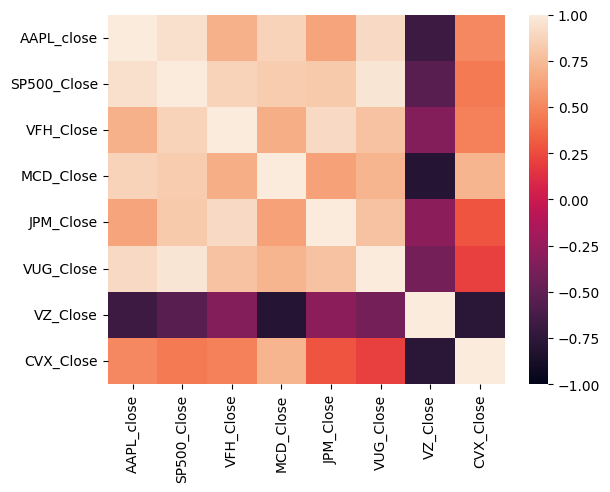

In [ ]:
# Display de correlation matrix
sns.heatmap(df_corr, vmax = 1, vmin = -1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single stock
df_cov = df.cov()
print(df_cov)

               AAPL_close    SP500_Close    VFH_Close     MCD_Close  \
AAPL_close    2164.797756   27751.245891   400.608573   1388.908000   
SP500_Close  27751.245891  402019.626957  6845.415500  18095.750617   
VFH_Close      400.608573    6845.415500   152.756930    289.770487   
MCD_Close     1388.908000   18095.750617   289.770487   1166.856825   
JPM_Close      652.864502   11542.687084   245.826618    467.989927   
VUG_Close     2112.605424   30752.223361   486.949627   1230.103309   
VZ_Close      -288.894485   -3058.263874   -37.558336   -246.748185   
CVX_Close      720.939176    8628.767611   180.453456    755.563914   

                JPM_Close     VUG_Close     VZ_Close    CVX_Close  
AAPL_close     652.864502   2112.605424  -288.894485   720.939176  
SP500_Close  11542.687084  30752.223361 -3058.263874  8628.767611  
VFH_Close      245.826618    486.949627   -37.558336   180.453456  
MCD_Close      467.989927   1230.103309  -246.748185   755.563914  
JPM_Close      484.3

In [ ]:
# Calculate variance of S&P 500
df_var_sp = df['SP500_Close'].var()*252
df_var_sp

101308945.99313517

In [ ]:
# Computing beta
df_beta = df_cov / df_var_sp
df_beta

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
AAPL_close,0.000021,0.000274,3.954326e-06,0.000014,6.444293e-06,0.000021,-2.851619e-06,0.000007
SP500_Close,0.000274,0.003968,6.756970e-05,0.000179,1.139355e-04,0.000304,-3.018750e-05,0.000085
VFH_Close,0.000004,0.000068,1.507833e-06,0.000003,2.426505e-06,0.000005,-3.707307e-07,0.000002
MCD_Close,0.000014,0.000179,2.860266e-06,0.000012,4.619433e-06,0.000012,-2.435601e-06,0.000007
JPM_Close,0.000006,0.000114,2.426505e-06,0.000005,4.781154e-06,0.000009,-5.925784e-07,0.000002
VUG_Close,0.000021,0.000304,4.806581e-06,0.000012,8.597213e-06,0.000025,-1.793678e-06,0.000003
VZ_Close,-0.000003,-0.000030,-3.707307e-07,-0.000002,-5.925784e-07,-0.000002,8.085821e-07,-0.000002
CVX_Close,0.000007,0.000085,1.781219e-06,0.000007,1.902107e-06,0.000003,-2.149675e-06,0.000009


In [ ]:
df_beta.shape

(8, 8)

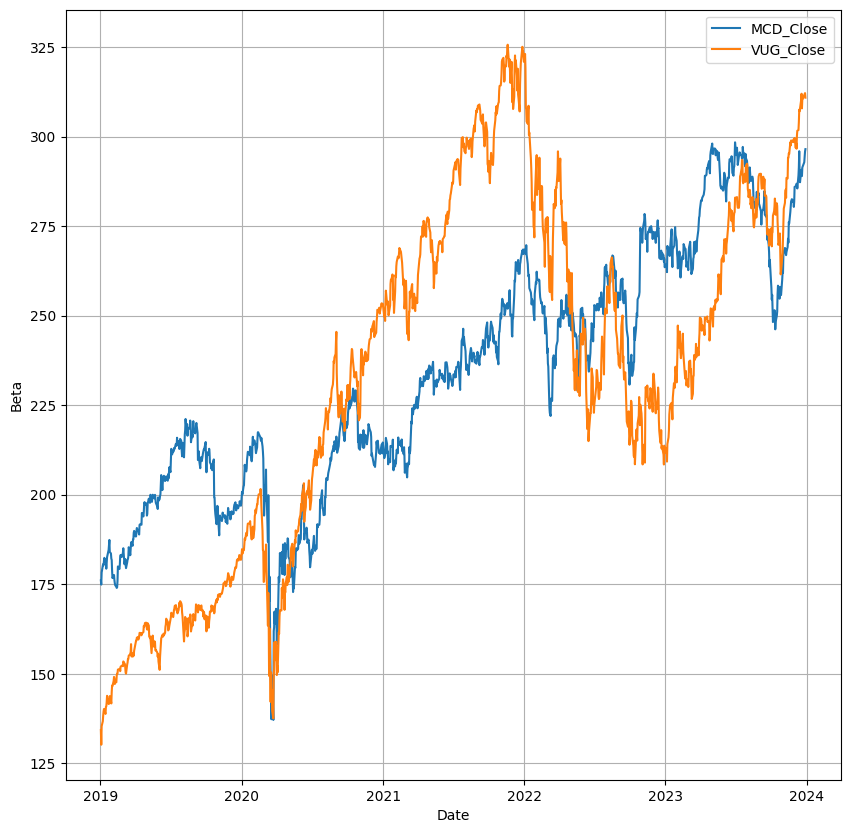

In [ ]:
# Plot beta trend
dates = df.index
betas = df['MCD_Close']
sp_beta = df['VUG_Close']

plt.figure(figsize = (10,10))
plt.plot(dates, betas, label = 'MCD_Close')
plt.plot(dates, sp_beta, label = 'VUG_Close')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

## Rolling Statistics continued: Exponential Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is similar to rolling std but using average. It takes the average amd puts more emphasis on the recent data rather than relying on older past data. This technique will help track trends, react to changes with new information, as well as balancing the past older data with the present data.

In [ ]:
# Use `ewm` to calculate the rolling window
rolling_ewa = df.ewm(span= 21).std()
rolling_ewa

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,2.780697,43.939712,0.728321,0.820247,1.555633,2.906209,0.141422,1.499068
2019-01-04,1.930295,44.207322,0.982688,1.763614,1.841232,2.765203,0.169804,1.267692
2019-01-07,1.545927,44.595066,0.955368,2.406274,1.708920,2.839359,0.298808,1.541845
2019-01-08,1.326062,47.947247,0.900676,2.499889,1.521327,3.101853,1.000352,1.404151
...,...,...,...,...,...,...,...,...
2023-12-22,5.184635,124.820223,3.444997,8.056220,7.257707,9.030807,1.053793,4.257998
2023-12-26,4.943408,125.168772,3.412079,7.911875,7.280674,8.958188,1.005130,4.305349
2023-12-27,4.713363,125.025553,3.382274,7.864004,7.330456,8.858637,0.958681,4.264522


# Sharpe Ratios
Now that we calculated some rolling statistics, its time to move on to another technique called Sharpe Ratio. Sharpe Ratio is process that will help manage the risk of a stock as well as the return to maximize the highest return rate with the lowest risk.


In [ ]:
annualization_factor = np.sqrt(252)

In [ ]:
df_mean = df.mean()
df_mean

AAPL_close      123.031085
SP500_Close    3755.831541
VFH_Close        77.925509
MCD_Close       233.196590
JPM_Close       129.582146
VUG_Close       233.698061
VZ_Close         50.811518
CVX_Close       126.128943
dtype: float64

In [ ]:
sharpe_r = (df_mean * annualization_factor)/ df_std

sharpe_r

AAPL_close      41.976523
SP500_Close     94.033532
VFH_Close      100.087411
MCD_Close      108.371150
JPM_Close       93.466331
VUG_Close       73.858168
VZ_Close        89.120267
CVX_Close       64.668991
dtype: float64

In [ ]:
#Annualized Sharpe Ratios
sr = (df.mean()*252)/df.std() * np.sqrt(252)
sr.sort_values(inplace=True, ascending = False)
sr

MCD_Close      27309.529692
VFH_Close      25222.027609
SP500_Close    23696.449961
JPM_Close      23553.515407
VZ_Close       22458.307316
VUG_Close      18612.258358
CVX_Close      16296.585680
AAPL_close     10578.083745
dtype: float64

In [ ]:
print(len(sr.index))
print(len(sr))


8
8


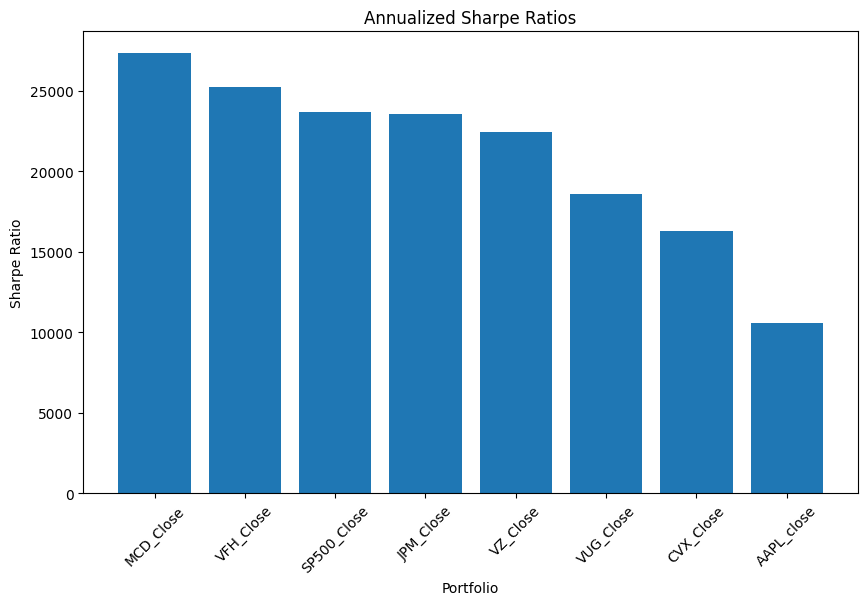

In [ ]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sr.index, sr)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#Custom Portfolio

It's now time to create a portfolio with the collection of stocks and analysis. in this section, we will build a portfolio of stocks, calculate the returns, and compare the results to the S&P 500.

1. We wll choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the percent change and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# Reading data from 1st chosen stock
mcd_df = df['MCD_Close'].head(252).pct_change()
mcd_df

Date
2019-01-02         NaN
2019-01-03   -0.006589
2019-01-04    0.019325
2019-01-07    0.010882
2019-01-08    0.002109
                ...   
2019-12-24    0.002396
2019-12-26    0.001983
2019-12-27    0.005633
2019-12-30   -0.006358
2019-12-31    0.003555
Name: MCD_Close, Length: 252, dtype: float64

In [ ]:
# Reading data from 2nd chosen stock
vfh_df = df['VFH_Close'].head(252).pct_change()
vfh_df

Date
2019-01-02         NaN
2019-01-03   -0.017221
2019-01-04    0.032664
2019-01-07    0.002306
2019-01-08    0.001479
                ...   
2019-12-24    0.000394
2019-12-26    0.005388
2019-12-27   -0.002484
2019-12-30   -0.002621
2019-12-31    0.002234
Name: VFH_Close, Length: 252, dtype: float64

In [ ]:
# Reading data from 3rd chosen stock
vz_df = df['VZ_Close'].head(252).pct_change()
vz_df

Date
2019-01-02         NaN
2019-01-03    0.003570
2019-01-04    0.002490
2019-01-07    0.006388
2019-01-08    0.029267
                ...   
2019-12-24   -0.001954
2019-12-26    0.000163
2019-12-27    0.003916
2019-12-30   -0.005201
2019-12-31    0.003104
Name: VZ_Close, Length: 252, dtype: float64

In [ ]:
sp_return = df['SP500_Close'] = df['SP500_Close'].pct_change()

In [ ]:
# Combine all stocks in a single DataFrame
cp = pd.concat([mcd_df,vfh_df,vz_df], axis = 1, join = 'inner')
cp

,MCD_Close,VFH_Close,VZ_Close
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.006589,-0.017221,0.003570
2019-01-04,0.019325,0.032664,0.002490
2019-01-07,0.010882,0.002306,0.006388
2019-01-08,0.002109,0.001479,0.029267
...,...,...,...
2019-12-24,0.002396,0.000394,-0.001954
2019-12-26,0.001983,0.005388,0.000163
2019-12-27,0.005633,-0.002484,0.003916


In [ ]:
# Reorganize portfolio data by having a column per symbol
cp.rename(columns = {'MCD_Close':'MCD','VFH_Close':'VFH','VZ_Close':'VZ'}, inplace=True)
cp.head()

,MCD,VFH,VZ
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.006589,-0.017221,0.003570
2019-01-04,0.019325,0.032664,0.002490
2019-01-07,0.010882,0.002306,0.006388
2019-01-08,0.002109,0.001479,0.029267


In [ ]:
# Calculate daily returns
#cp_returns = cp.pct_change()

# Drop NAs
#cp_returns.dropna(inplace=True)
# Display sample data
#cp_returns.head()

,MCD,VFH,VZ
Date,,,
2019-01-04,-3.933113,-2.896740,-0.302494
2019-01-07,-0.436918,-0.929390,1.565041
2019-01-08,-0.806230,-0.358618,3.581845
2019-01-09,-1.814096,2.772198,-1.778424
2019-01-10,-5.071367,-0.707517,-1.423173


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

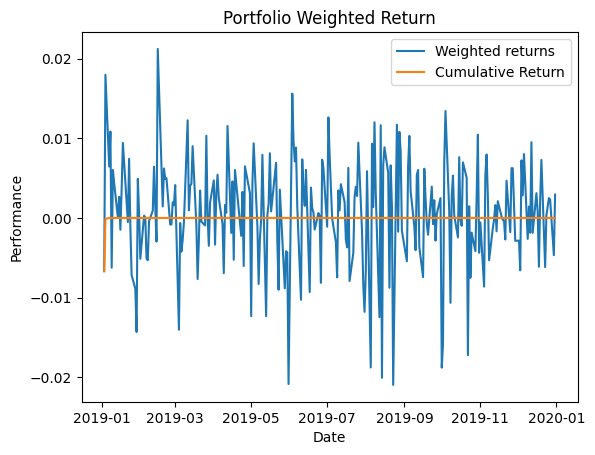

In [ ]:
# Set weights
wgt= [.33, .33, .33]

# Calculate portfolio return
opt_returns = cp.dot(wgt)
cumulative_cp_returns = (opt_returns).cumprod()

# Display sample data
plt.plot(opt_returns, label = "Weighted returns")
plt.plot(cumulative_cp_returns, label="Cumulative Return")
plt.title("Portfolio Weighted Return")
plt.xlabel("Date")
plt.ylabel("Performance")
plt.legend()
plt.show()


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([cp, daily_returns], axis = 1, join = 'inner')
all_returns.head(10)

,MCD,VFH,VZ,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,,,,
2019-01-03,-0.006589,-0.017221,0.003570,-0.099607,-0.024757,-0.017221,-0.006589,-0.022153,-0.030605,0.003570,-0.019153
2019-01-04,0.019325,0.032664,0.002490,0.042689,0.034336,0.032664,0.019325,0.036865,0.039791,0.002490,0.020724
2019-01-07,0.010882,0.002306,0.006388,-0.002226,0.007010,0.002306,0.010882,0.000695,0.010195,0.006388,0.012994
2019-01-08,0.002109,0.001479,0.029267,0.019063,0.009695,0.001479,0.002109,-0.001886,0.012213,0.029267,-0.004365
2019-01-09,-0.001717,0.005580,-0.022782,0.016982,0.004098,0.005580,-0.001717,-0.001690,0.007803,-0.022782,0.013420
2019-01-10,0.006989,0.001632,0.009641,0.003196,0.004518,0.001632,0.006989,-0.000100,0.004803,0.009641,0.001589
2019-01-11,0.004517,0.001467,0.007292,-0.009818,-0.000146,0.001467,0.004517,-0.004781,-0.002497,0.007292,-0.008021
2019-01-14,-0.006306,0.006183,0.000172,-0.015037,-0.005258,0.006183,-0.006306,0.010309,-0.007367,0.000172,-0.007286
2019-01-15,-0.001104,0.007924,0.001206,0.020467,0.010722,0.007924,-0.001104,0.007331,0.014411,0.001206,0.003580


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

MCD            0
VFH            0
VZ             0
AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
asd = cp.std() * np.sqrt(252)
asd.sort_values(inplace=True)
asd

MCD    0.150551
VFH    0.152886
VZ     0.161921
dtype: float64

### Calculate and plot rolling `std` with 21-day window

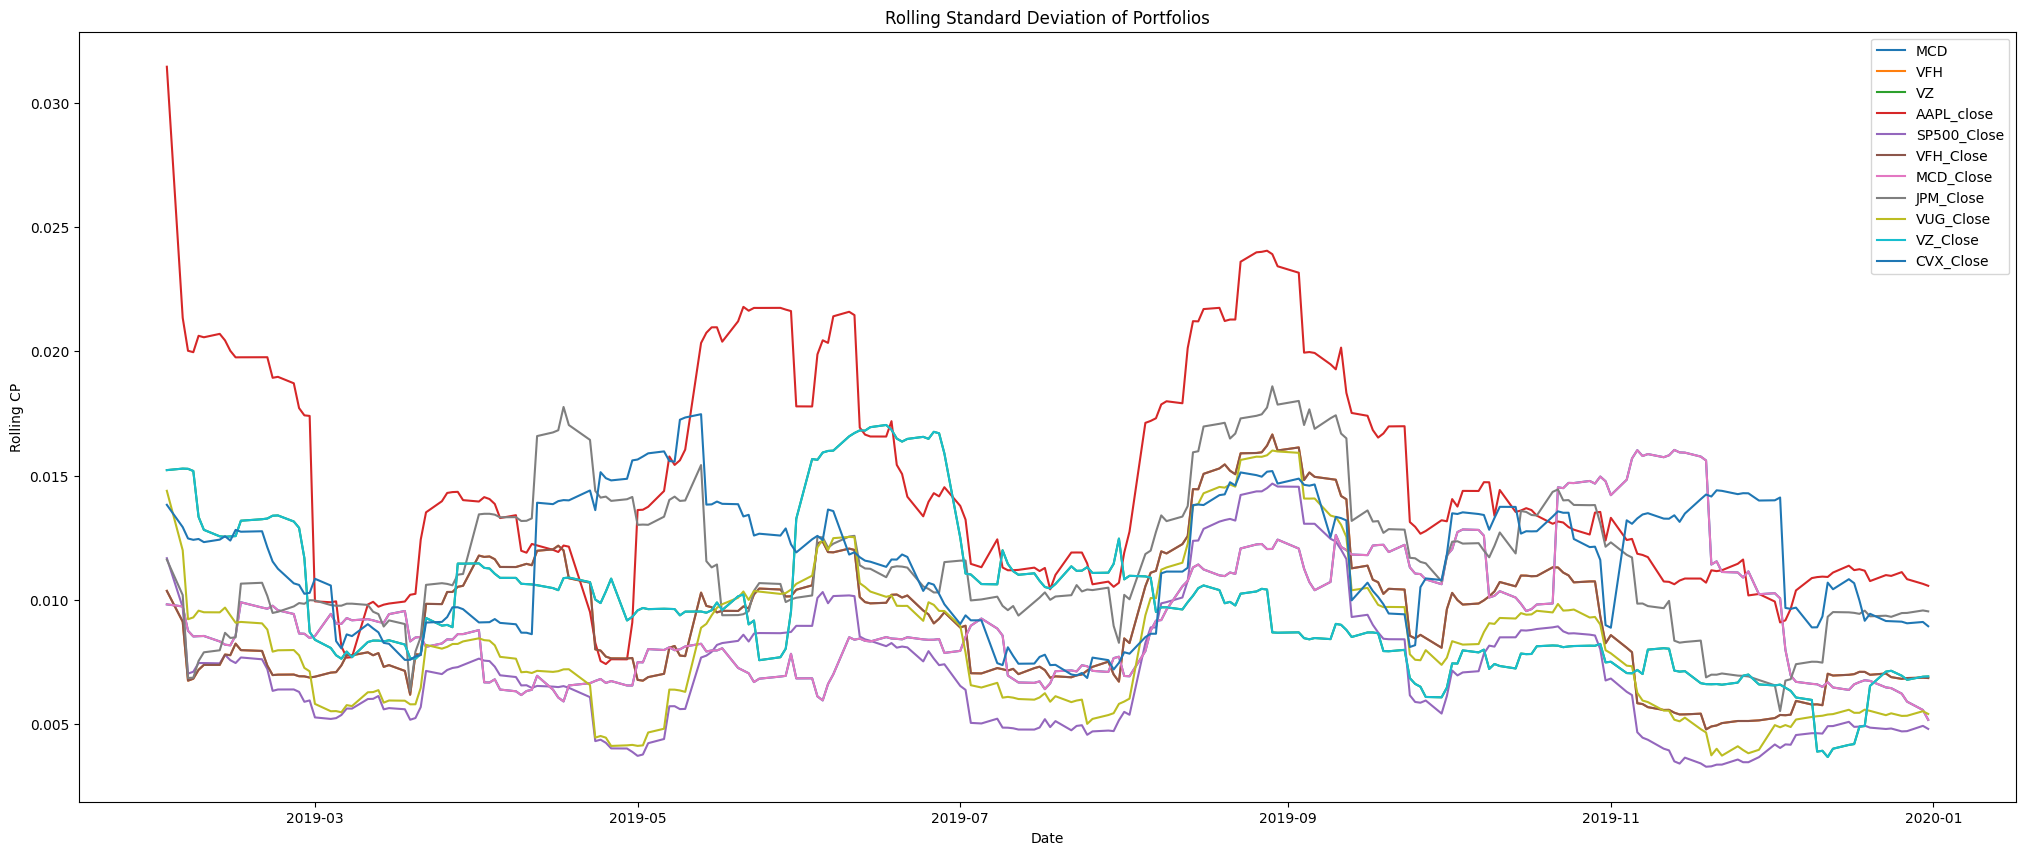

In [ ]:
# Calculate rolling standard deviation
rolling_cp = cp.rolling(window = 21).std()
# Plot rolling standard deviation
plt.figure(figsize=(25, 10))
for column in rolling_cp.columns:
        plt.plot(rolling_cp.index, rolling_cp[column], label=column)

plt.title('Rolling Standard Deviation of Portfolios')
plt.xlabel('Date')
plt.ylabel('Rolling CP')
plt.legend()
plt.show()


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
all_returns_corr = all_returns.corr()
all_returns_corr

,MCD,VFH,VZ,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
MCD,1.000000,0.231267,0.248302,0.145188,0.351660,0.231267,1.000000,0.119798,0.364953,0.248302,0.021090
VFH,0.231267,1.000000,0.187707,0.537488,0.837201,1.000000,0.231267,0.894619,0.736017,0.187707,0.505180
VZ,0.248302,0.187707,1.000000,0.073571,0.277856,0.187707,0.248302,0.121498,0.210662,1.000000,0.159282
AAPL_close,0.145188,0.537488,0.073571,1.000000,0.742308,0.537488,0.145188,0.470156,0.768487,0.073571,0.360350
SP500_Close,0.351660,0.837201,0.277856,0.742308,1.000000,0.837201,0.351660,0.706283,0.970921,0.277856,0.548589
VFH_Close,0.231267,1.000000,0.187707,0.537488,0.837201,1.000000,0.231267,0.894619,0.736017,0.187707,0.505180
MCD_Close,1.000000,0.231267,0.248302,0.145188,0.351660,0.231267,1.000000,0.119798,0.364953,0.248302,0.021090
JPM_Close,0.119798,0.894619,0.121498,0.470156,0.706283,0.894619,0.119798,1.000000,0.600316,0.121498,0.399004
VUG_Close,0.364953,0.736017,0.210662,0.768487,0.970921,0.736017,0.364953,0.600316,1.000000,0.210662,0.480568
VZ_Close,0.248302,0.187707,1.000000,0.073571,0.277856,0.187707,0.248302,0.121498,0.210662,1.000000,0.159282


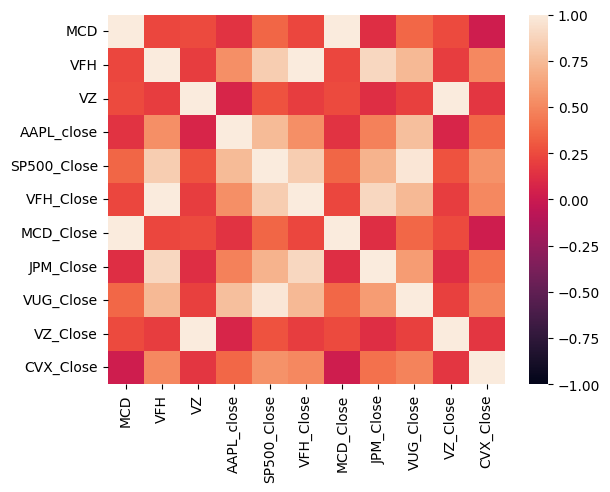

In [ ]:
sns.heatmap(all_returns_corr, vmax = 1, vmin = -1);

### Calculating and Plotting Rolling 60-day Beta for the custom Portfolio compared to the S&P 500

In [ ]:
cp_beta = pd.concat([mcd_df, vfh_df,vz_df,sp_return], axis = 1, join = 'inner')
cp_beta.head()

,MCD_Close,VFH_Close,VZ_Close,SP500_Close
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.006589,-0.017221,0.003570,-0.024757
2019-01-04,0.019325,0.032664,0.002490,0.034336
2019-01-07,0.010882,0.002306,0.006388,0.007010
2019-01-08,0.002109,0.001479,0.029267,0.009695


In [ ]:
cp_beta["portfolio"] = cp_beta.mean(axis=1)
cp_beta

,MCD_Close,VFH_Close,VZ_Close,SP500_Close,portfolio
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.006589,-0.017221,0.003570,-0.024757,-0.011249
2019-01-04,0.019325,0.032664,0.002490,0.034336,0.022204
2019-01-07,0.010882,0.002306,0.006388,0.007010,0.006647
2019-01-08,0.002109,0.001479,0.029267,0.009695,0.010637
...,...,...,...,...,...
2019-12-24,0.002396,0.000394,-0.001954,-0.000195,0.000160
2019-12-26,0.001983,0.005388,0.000163,0.005128,0.003166
2019-12-27,0.005633,-0.002484,0.003916,0.000034,0.001775


In [ ]:
# Calculate and plot Beta
covar = cp_beta['portfolio'].cov(cp_beta["SP500_Close"])
#Calculate variance
Var = cp_beta["SP500_Close"].var()
#Calculate Beta
portfolio_beta = covar / Var
portfolio_beta


0.7019699139966233

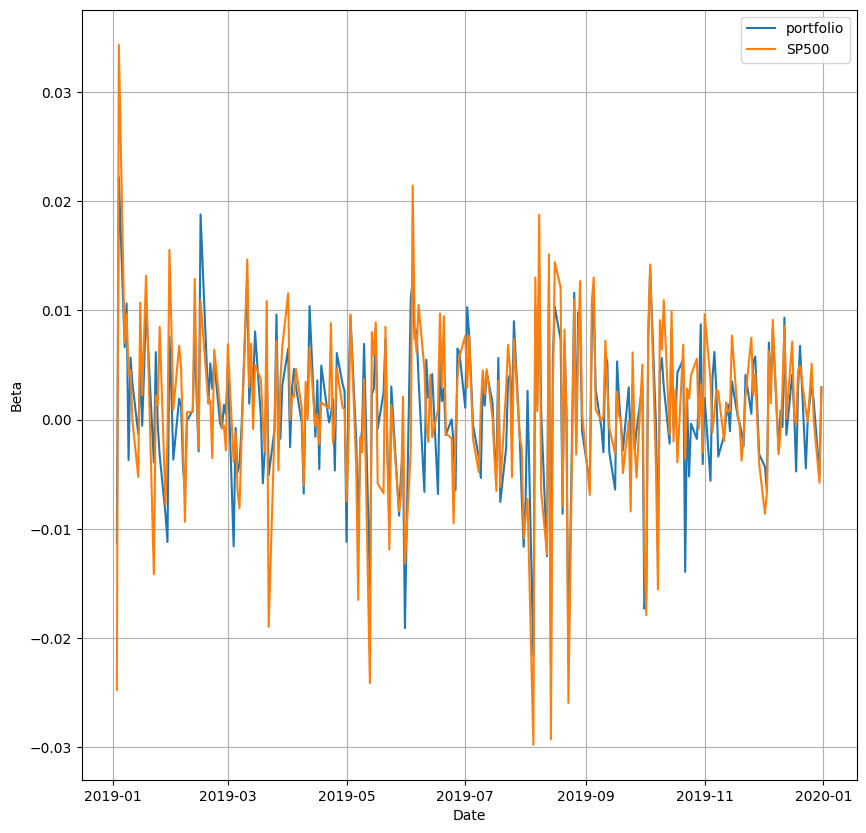

In [ ]:
# Plot beta trend
dates = cp.index
betas = cp_beta['portfolio']
sp_beta = cp_beta['SP500_Close']

plt.figure(figsize = (10,10))
plt.plot(dates, betas, label = 'portfolio')
plt.plot(dates, sp_beta, label = 'SP500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
cp_sr = (cp.mean()*252)/cp.std() * np.sqrt(252)
cp_sr.sort_values(inplace=True, ascending = False)
cp_sr

VFH    421.948704
MCD    213.104438
VZ     163.692378
dtype: float64

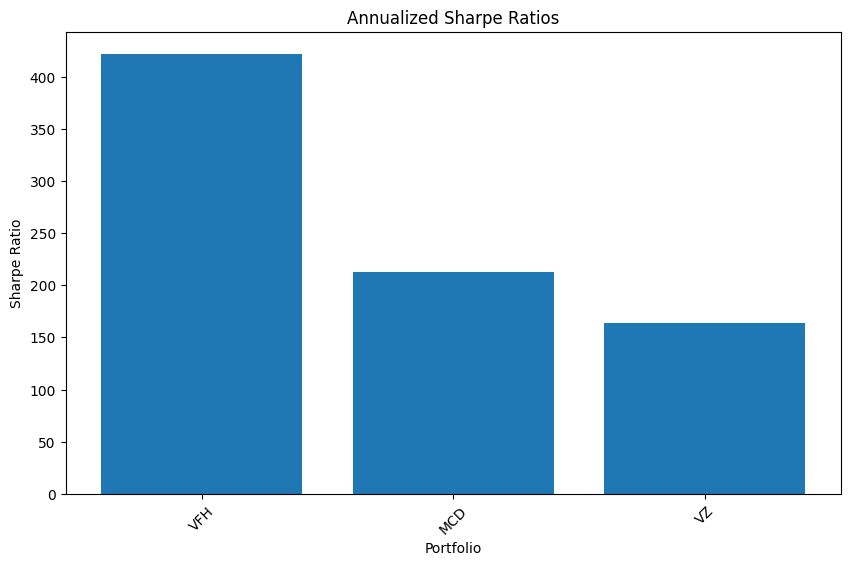

In [ ]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cp_sr.index, cp_sr)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)
plt.plot();  # Rotate x-axis la